# Clinical Readmission ML – Exploratory Data Analysis

## Problem Statement
The objective of this project is to analyze hospital patient data and 
identify patterns associated with hospital readmission.

The target variable is:
- **readmitted** (yes / no)

This EDA focuses on:
- Understanding dataset structure
- Identifying data quality issues
- Performing necessary cleaning
- Extracting meaningful insights
- Preparing a cleaned dataset for modeling

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("hospital_readmissions.csv")

df.head()
df.shape

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


(25000, 17)

In [3]:
df.info()
df.describe()
df.duplicated().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


np.int64(0)

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

### Observations:
- Dataset contains 25,000 records and 17 features.
- No missing values detected (NaN).
- No duplicate rows found.
- Dataset includes 7 numerical and 10 categorical features.

In [4]:
for col in df.columns:
    print(f"\n{col}")
    print("Unique values:", df[col].nunique())


age
Unique values: 6

time_in_hospital
Unique values: 14

n_lab_procedures
Unique values: 109

n_procedures
Unique values: 7

n_medications
Unique values: 70

n_outpatient
Unique values: 23

n_inpatient
Unique values: 16

n_emergency
Unique values: 21

medical_specialty
Unique values: 7

diag_1
Unique values: 8

diag_2
Unique values: 8

diag_3
Unique values: 8

glucose_test
Unique values: 3

A1Ctest
Unique values: 3

change
Unique values: 2

diabetes_med
Unique values: 2

readmitted
Unique values: 2


In [5]:
diag_cols = ["diag_1", "diag_2", "diag_3"]

for col in diag_cols:
    df[col] = df[col].replace("Missing", "Unknown")


In [6]:
df['diag_1'].value_counts().head()


diag_1
Circulatory    7824
Other          6498
Respiratory    3680
Digestive      2329
Diabetes       1747
Name: count, dtype: int64

In [7]:
df['diag_2'].value_counts().head()

diag_2
Other          9056
Circulatory    8134
Diabetes       2906
Respiratory    2872
Digestive       973
Name: count, dtype: int64

In [8]:
df['diag_3'].value_counts().head()

diag_3
Other          9107
Circulatory    7686
Diabetes       4261
Respiratory    1915
Digestive       916
Name: count, dtype: int64

### Cleaning Step:
- Replaced "Missing" values in diagnosis columns with "Unknown" 
to treat them as a valid category instead of ambiguous text.

In [9]:
cols_to_cap = ["n_medications", "n_emergency", "n_outpatient", "n_inpatient"]

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] > upper, upper, df[col])

df[cols_to_cap].describe()

,n_medications,n_emergency,n_outpatient,n_inpatient
count,25000.000000,25000.0,25000.0,25000.000000
mean,15.994560,0.0,0.0,0.512560
std,7.220577,0.0,0.0,0.804231
min,1.000000,0.0,0.0,0.000000
25%,11.000000,0.0,0.0,0.000000
50%,15.000000,0.0,0.0,0.000000
75%,20.000000,0.0,0.0,1.000000
max,33.500000,0.0,0.0,2.500000


### Outlier Treatment:
- Extreme upper values were capped using the IQR method.
- Rows were not removed to preserve real-world data distribution.

<Axes: xlabel='readmitted', ylabel='count'>

Text(0.5, 1.0, 'Readmission Distribution')

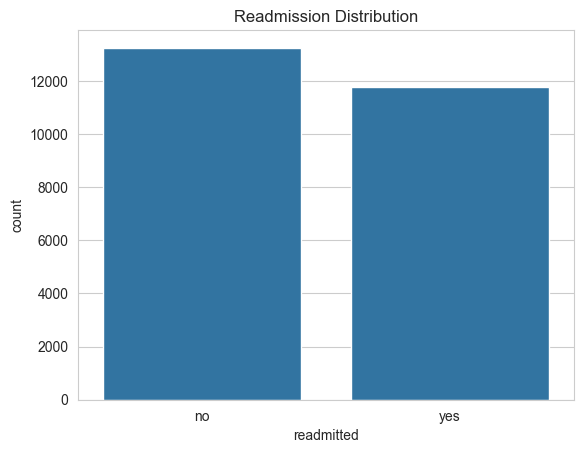

readmitted
no     52.984
yes    47.016
Name: proportion, dtype: float64

In [10]:
sns.countplot(x="readmitted", data=df)
plt.title("Readmission Distribution")
plt.show()

df["readmitted"].value_counts(normalize=True) * 100

### Target Distribution:
- The dataset is moderately balanced (53% no, 47% yes).

### Univariate Analysis on Numerical Features

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='time_in_hospital', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of time_in_hospital')

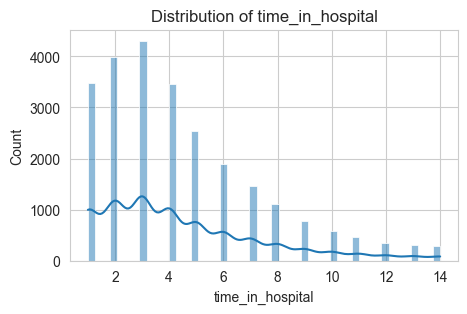

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='n_lab_procedures', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of n_lab_procedures')

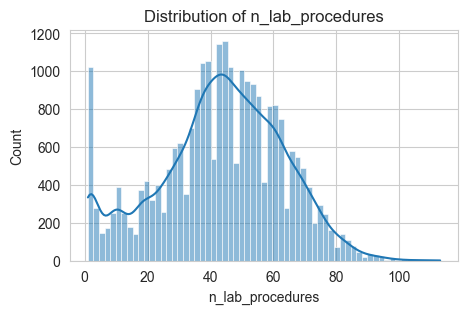

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='n_procedures', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of n_procedures')

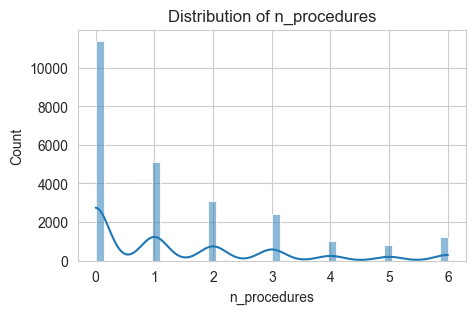

In [11]:
num_cols = df.select_dtypes(include="int64").columns

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Univariate Analysis on the Categorical


In [12]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    print("\n", col)
    print(df[col].value_counts().head())


 age
age
[70-80)    6837
[60-70)    5913
[80-90)    4516
[50-60)    4452
[40-50)    2532
Name: count, dtype: int64

 medical_specialty
medical_specialty
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Name: count, dtype: int64

 diag_1
diag_1
Circulatory    7824
Other          6498
Respiratory    3680
Digestive      2329
Diabetes       1747
Name: count, dtype: int64

 diag_2
diag_2
Other          9056
Circulatory    8134
Diabetes       2906
Respiratory    2872
Digestive       973
Name: count, dtype: int64

 diag_3
diag_3
Other          9107
Circulatory    7686
Diabetes       4261
Respiratory    1915
Digestive       916
Name: count, dtype: int64

 glucose_test
glucose_test
no        23625
normal      689
high        686
Name: count, dtype: int64

 A1Ctest
A1Ctest
no        20938
high       2827
normal     1235
Name: count, dtype: int64

 change
change
no     13497
yes    1150

<Axes: xlabel='diabetes_med', ylabel='count'>

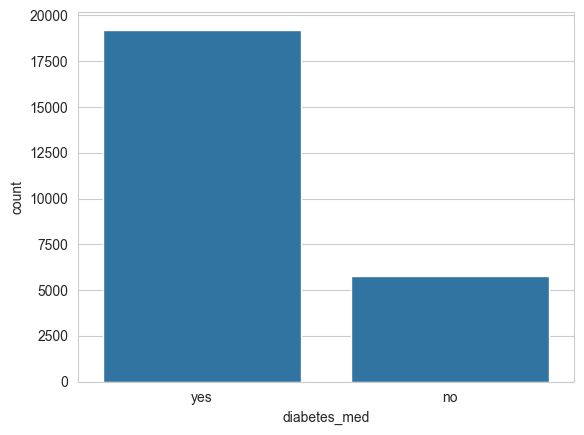

In [13]:
sns.countplot(x="diabetes_med", data=df)
plt.show()

### Bivariate – Numerical vs Target

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='readmitted', ylabel='time_in_hospital'>

Text(0.5, 1.0, 'time_in_hospital vs Readmitted')

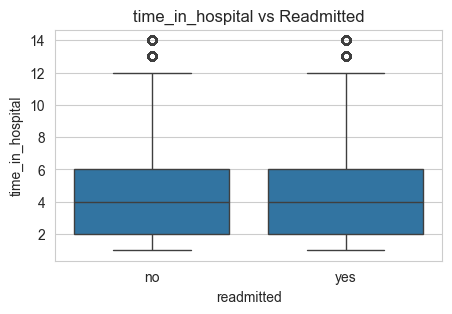

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='readmitted', ylabel='n_lab_procedures'>

Text(0.5, 1.0, 'n_lab_procedures vs Readmitted')

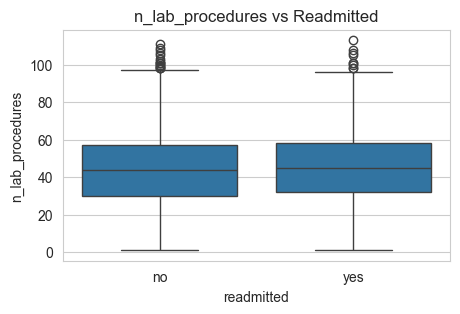

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='readmitted', ylabel='n_procedures'>

Text(0.5, 1.0, 'n_procedures vs Readmitted')

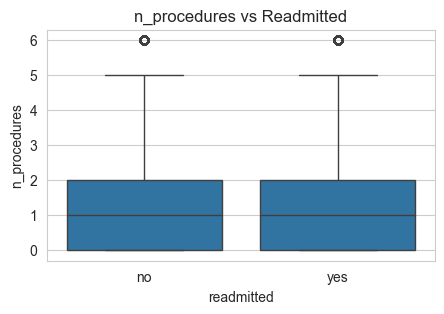

In [14]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x="readmitted", y=col, data=df)
    plt.title(f"{col} vs Readmitted")
    plt.show()

In [15]:
# Bivariate – Categorical vs Target

pd.crosstab(df["age"], df["readmitted"], normalize="index")
pd.crosstab(df["diabetes_med"], df["readmitted"], normalize="index")

readmitted,no,yes
age,,
[40-50),0.554897,0.445103
[50-60),0.558401,0.441599
[60-70),0.531541,0.468459
[70-80),0.512067,0.487933
[80-90),0.504207,0.495793
[90-100),0.578667,0.421333


readmitted,no,yes
diabetes_med,,
no,0.586452,0.413548
yes,0.512846,0.487154


<Axes: xlabel='age'>

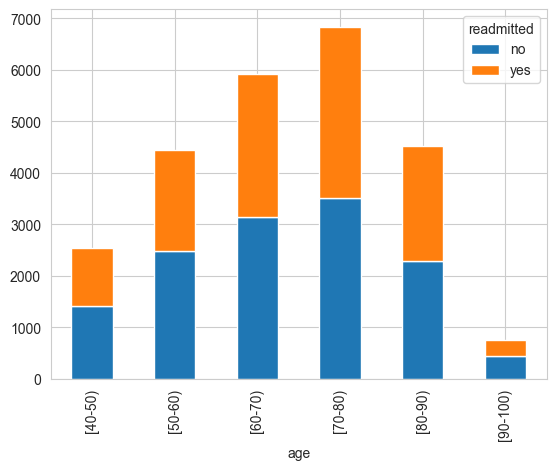

In [16]:
pd.crosstab(df["age"], df["readmitted"]).plot(kind="bar", stacked=True)
plt.show()

In [17]:
df[df["n_inpatient"] > 2]["readmitted"].value_counts(normalize=True)


readmitted
yes    0.756757
no     0.243243
Name: proportion, dtype: float64

In [18]:
df[df["age"] == "[80-90)"]["readmitted"].value_counts(normalize=True)


readmitted
no     0.504207
yes    0.495793
Name: proportion, dtype: float64

In [19]:
df[(df["n_medications"] > 25) & (df["readmitted"] == "yes")].shape

(1322, 17)

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

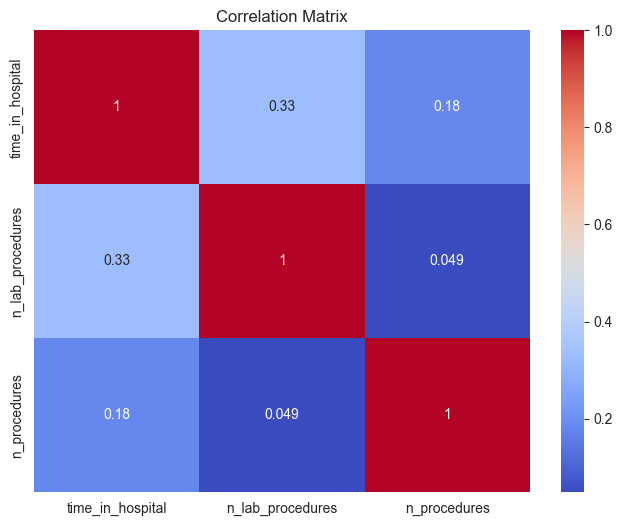

In [20]:
### Correlation on numerical columns only

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

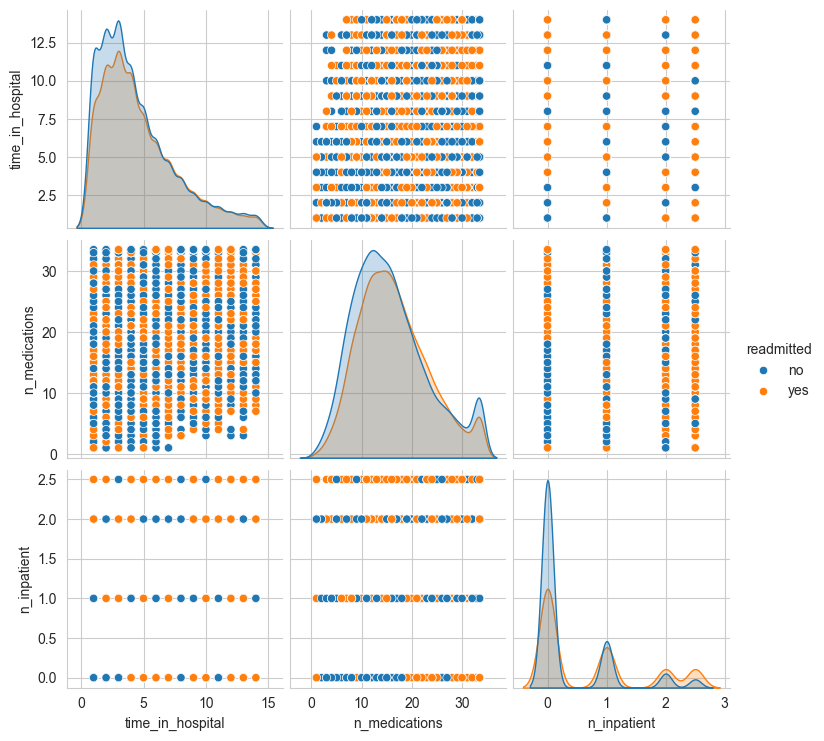

In [21]:
sns.pairplot(df[["time_in_hospital", "n_medications", "n_inpatient", "readmitted"]],
             hue="readmitted")
plt.show()

In [22]:
df.to_csv("hospital_readmissions_cleaned.csv", index=False)